# From Zero🙎🏾to Hero🦸🏾: Mastering Generative AI with MongoDB

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mongodb-developer/GenAI-Showcase/blob/main/notebooks/agents/zero_to_hero_with_genai_with_mongodb_openai.ipynb)

**What to Expect**

[**Part 1: Foundations of Generative AI & Search**](#part1)
- **Comprehensive understanding of Generative AI applications**
- **In-depth code walkthroughs** of various retrieval mechanisms including text search, vector search, and hybrid search
- **Exploration of Voyage AI** and embedding generation techniques

[**Part 2: Building Intelligent Search Systems**](#part2)
- **Hands-on implementation** of semantic search mechanisms
- **Practical development** of Retrieval Augmented Generation (RAG) systems

[**Part 3: Advanced AI Agents & Integration**](#part3)
- **Introduction to AI Agents** and their capabilities
- **Step-by-step implementation** of Agentic RAG with MongoDB
- **OPENAI Agent SDK**: Build AI Agents with OpenAI Agent SDK

[**Part 4: Agentic Chat System**](#part4)
- Agentic Chatbot that can answer queries
- Implement persistent chat history tracking
- Preserve conversation context across interactions
- Implement advanced query-answering mechanisms




---


**How to use this notebook:**
- Execute each cell block sequentially
- Look out for checkpoints ⛳ for key learning takeaways
- Look out for key information 🔑 for insights that are useful in LLM application development
- Ensure you use external link provided to gain access to MongoDB Free Account, Voyage AI API key or any other resources requried

---


* Don't forget to Star 🌟 us on [GitHub](https://github.com/mongodb-developer/GenAI-Showcase)
* And Checkout the [AI Learning Hub](https://www.mongodb.com/resources/use-cases/artificial-intelligence)

# 💼 Use Case: Virtual Primary Care Assistant for Medical Pharmarcy


---



## Overview
The Virtual Primary Care Assistant leverages MongoDB's vector search capabilities to provide CVS Pharmacy customers with reliable medical information and personalized guidance based on medication reviews and health conditions. This intelligent assistant integrates with a  Medical Pharmarcy's existing customer data infrastructure to offer a comprehensive health support experience.

## Key Features
- **Medication Information Retrieval**: Users can ask questions about medications and receive accurate information about dosage, side effects, and drug interactions.
- **Experience-Based Insights**: Leverages real patient reviews and experiences to provide context-rich responses about medication effectiveness for specific conditions.
- **Symptom Assessment**: Helps users understand possible conditions based on symptoms and suggests when to seek professional medical care.
- **Personalized Recommendations**: Provides tailored guidance by considering the user's prescription history, health profile, and previous interactions.

## Technical Implementation
- MongoDB serves as the knowledge base, storing structured medication data and vector embeddings of patient reviews
- Vector search enables semantic understanding of user queries about medications and conditions
- Hybrid search combines keyword and semantic matching for optimal retrieval of relevant information
- RAG architecture integrates retrieval results with LLM processing to generate accurate, contextual responses
- Agentic capabilities allow the system to determine when to search for information versus when to recommend professional consultation

## Business Value
- Reduces call center volume by answering common medication questions
- Improves medication adherence through accessible information and reminders
- Enhances customer satisfaction by providing 24/7 access to reliable health guidance
- Generates insights on common customer concerns to inform product offerings and services

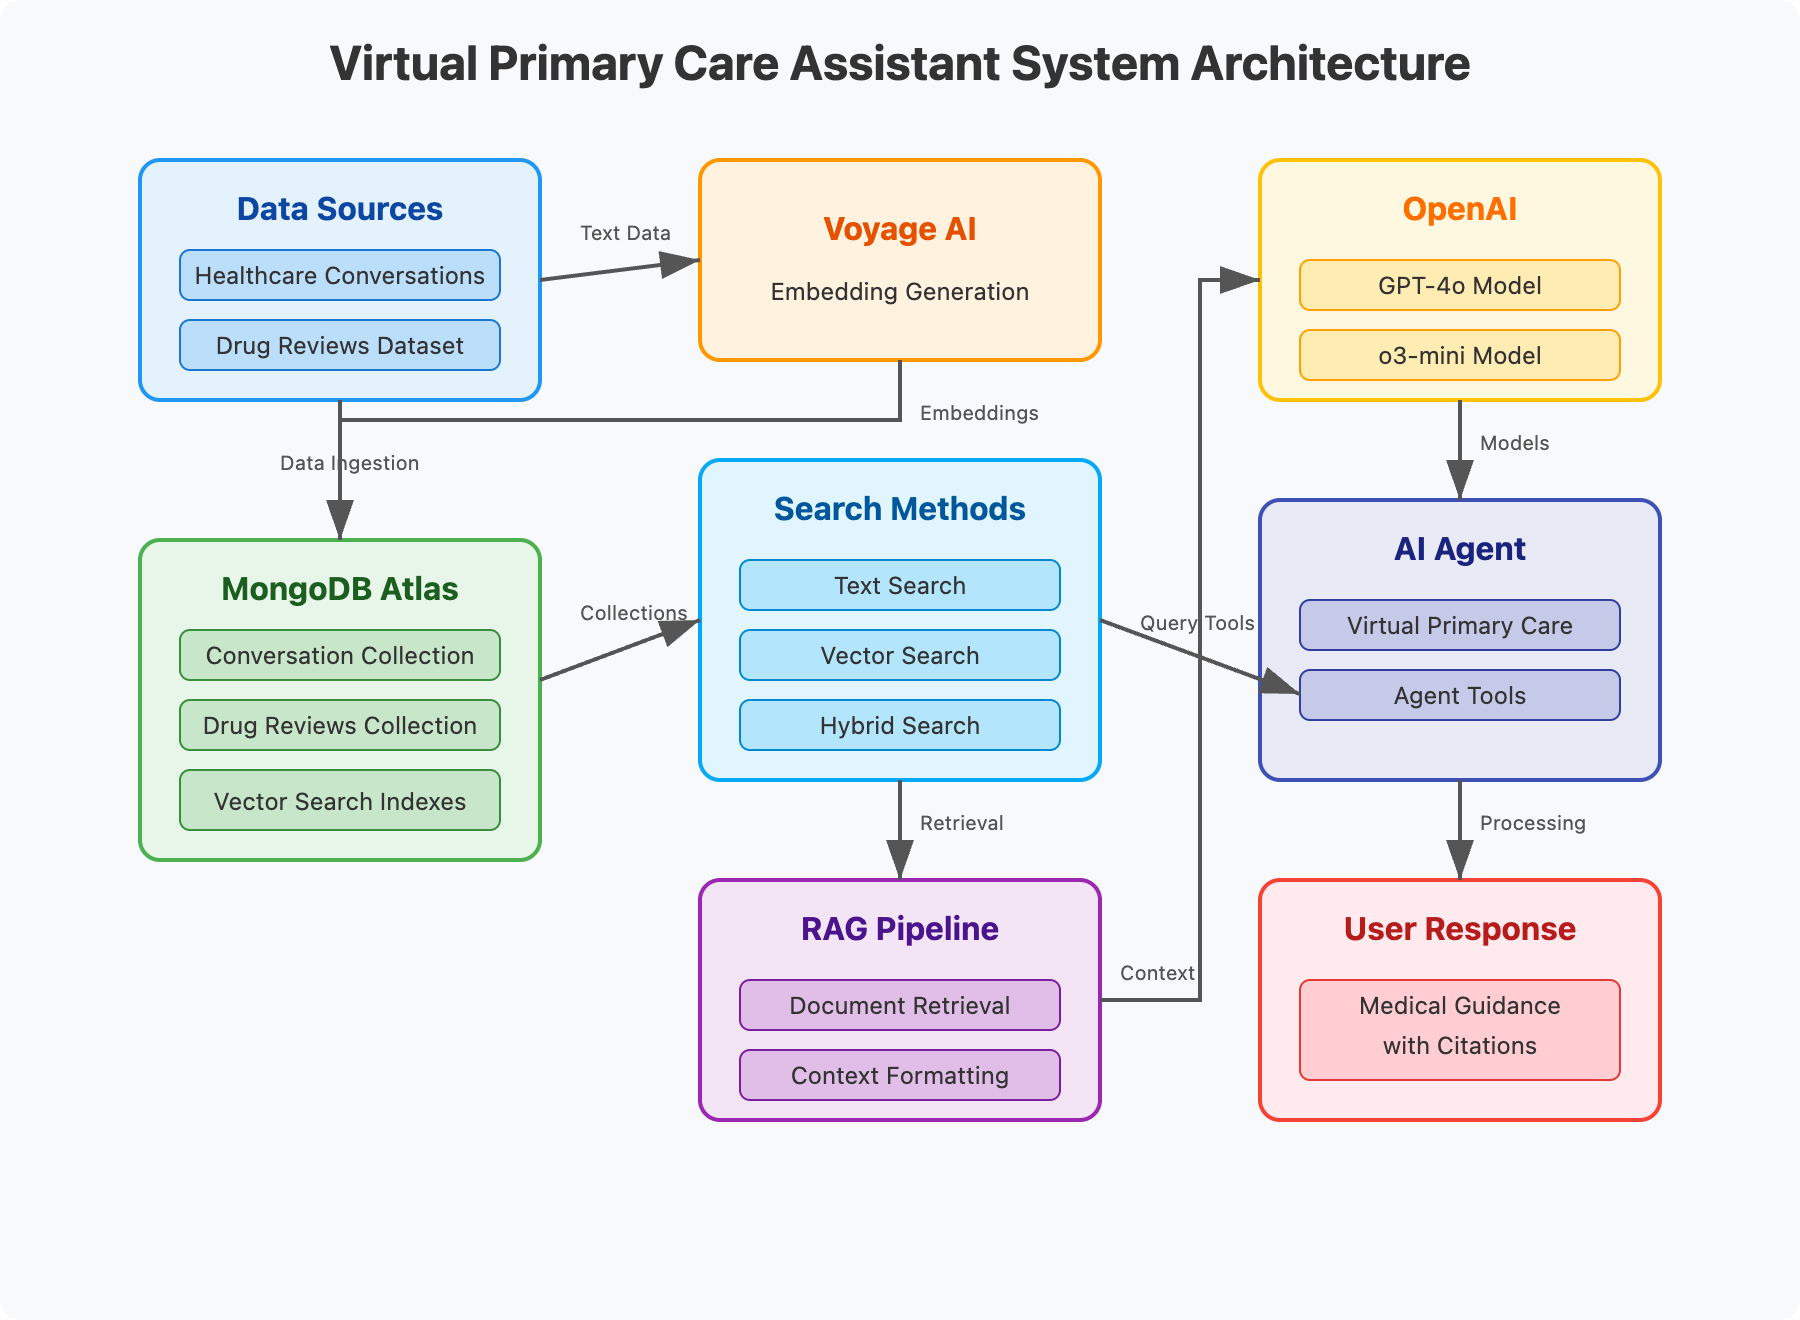

## Part 1: Foundations of Generative AI & Search
<a name="part1"></a>

---
- **Understanding Generative AI Applications**
  - Core concepts and architecture
  - LLMs and their capabilities
  - Real-world use cases and limitations
- **Retrieval Mechanisms Deep Dive**
  - Traditional text search techniques
  - Vector search fundamentals
  - Hybrid search approaches and when to use each
- **Embedding Generation with Voyage AI**
  - Introduction to embeddings and their importance
  - Working with Voyage AI embedding models
  - Optimizing embedding generation for different content types


### Step 1: Importing Libraries

Install the necessary libraries for the notebook
- pymongo: MongoDB Python driver, this will be used to connect to the MongoDB Atlas cluster.
- voyageai: Voyage AI Python client. This will be used to generate the embeddings for the wikipedia data.
- pandas: Data manipulation and analysis, this will be used to load the wikipedia data and prepare it for the vector search.
- datasets: Load and manage datasets, this will be used to load the wikipedia data.
- matplotlib: Plotting and visualizing data, this will be used to visualize the data.

In [ ]:
!pip install -Uq pymongo voyageai pandas datasets matplotlib

Creating the function `set_env_securely` to securely get and set environment variables. This is a helper function to get and set environment variables securely.

In [17]:
import getpass
import os


# Function to securely get and set environment variables
def set_env_securely(var_name, prompt):
    value = getpass.getpass(prompt)
    os.environ[var_name] = value

### Step 2: Data Loading and Preparation

For this Virtual Primary Care Assistant, we're working with two complementary datasets:

1. **[ChatDoctor-HealthCareMagic-100k](https://huggingface.co/datasets/lavita/ChatDoctor-HealthCareMagic-100k)**
  - This dataset contains doctor-patient conversations about medical conditions and treatments
  - It provides authentic patient questions and professional medical responses
  - We use this data to train our system to understand medical queries and provide informed responses

2. **[Drug Reviews Dataset](https://huggingface.co/datasets/Reboot87/drugs_reviews_dataset)**
  - Contains patient-reported experiences with various medications
  - Includes information about conditions treated, effectiveness ratings, and detailed reviews
  - Provides valuable real-world insights on medication effects and side effects

The structure of these datasets is as follows:

**Healthcare Conversation Dataset:**
- `input`: Patient's medical question or symptom description
- `output`: Doctor's medical advice or response

**Drug Reviews Dataset:**
- `drugName`: Name of the medication
- `condition`: Medical condition being treated
- `review`: Patient's detailed experience with the medication
- `rating`: Numerical rating (1-10) of the patient's satisfaction

These datasets provide complementary information that allows our system to understand medical questions, provide contextual information about medications, and offer personalized guidance based on real patient experiences.

In [18]:
# Import necessary libraries
# datasets is a Hugging Face library for accessing and working with datasets
# pandas is used for data manipulation and analysis
import pandas as pd
from datasets import load_dataset

In [19]:
# Load the healthcare conversation dataset from Hugging Face repository
# This dataset contains doctor-patient conversations for medical advice
# 'lavita/ChatDoctor-HealthCareMagic-100k' is a dataset with 100k medical conversations
healthcare_conversation_dataset = load_dataset(
    "lavita/ChatDoctor-HealthCareMagic-100k", streaming=True, split="train"
)

# Limit the dataset to 10,000 examples for processing efficiency
# Using .take() method which is memory-efficient as it streams the data
# This is important for large datasets to avoid memory issues
healthcare_conversation_dataset = healthcare_conversation_dataset.take(1000)

In [20]:
# Load the drug reviews dataset from Hugging Face repository
# This dataset contains patient reviews of various medications
# 'Reboot87/drugs_reviews_dataset' contains structured data about drug experiences
drug_reviews_dataset = load_dataset(
    "Reboot87/drugs_reviews_dataset", streaming=True, split="train"
)

# Limit the dataset to 10,000 examples to manage memory usage and processing time
# This sample size should be sufficient for building our demonstration model
# The streaming=True parameter ensures we don't load the entire dataset into memory
drug_reviews_dataset = drug_reviews_dataset.take(1000)

In [21]:
# Convert datasets to dataframes for easier manipulation and analysis
# Pandas DataFrames provide powerful tools for data exploration and preprocessing
# This transformation allows us to use pandas' rich functionality for data cleaning and feature engineering
healthcare_conversation_dataset = pd.DataFrame(healthcare_conversation_dataset)

# Similarly convert the drug reviews dataset to a DataFrame
# This enables SQL-like operations, filtering, and statistical analysis
# Having both datasets as DataFrames ensures consistent data handling approaches
drug_reviews_dataset = pd.DataFrame(drug_reviews_dataset)

In [22]:
# Remove the attributes instruction from the healthcare_conversation_dataset
# The 'instruction' column contains generic prompts that aren't needed for our conversational data analysis
# Removing it helps focus on the actual patient inputs and doctor responses
healthcare_conversation_dataset = healthcare_conversation_dataset.drop(
    columns=["instruction"]
)

# Remove the attributes patientId, date, usefulCount and review_length from the drug_reviews_dataset
# patientId: Removed to ensure data anonymization and privacy protection
# date: Temporal information isn't critical for our current analysis
# usefulCount: Engagement metrics aren't relevant for our semantic understanding
# review_length: This is a derived feature that can be recalculated if needed
drug_reviews_dataset = drug_reviews_dataset.drop(
    columns=["patientId", "date", "usefulCount", "review_length"]
)

In [ ]:
healthcare_conversation_dataset.head()

In [ ]:
drug_reviews_dataset.head()

### Step 4: Embedding Generation with Voyage AI

In this step, we will generate the embeddings for the wikipedia data using the Voyage AI API.

We will use the `voyage-3-large` model to generate the embeddings.

One importnat thing to note is that althoguh you are expected to have credit card for the voyage api, your first 200 million tokens are free for every account, and subsequent usage is priced on a per-token basis.

Go [here](https://docs.voyageai.com/docs/api-key-and-installation) for more information on getting your API key and setting it in the environment variables.

In [29]:
set_env_securely("VOYAGE_API_KEY", "Enter your Voyage API Key: ")

In [30]:
import voyageai

# Initialize the Voyage AI client.
voyageai_client = voyageai.Client()


def get_embedding(text, task_prefix="document"):
    """
    Generate embeddings for a text string with a task-specific prefix using the voyage-3-large model.

    Parameters:
        text (str): The input text to be embedded.
        task_prefix (str): A prefix describing the task; this is prepended to the text.

    Returns:
        list: The embedding vector as a list of floats (or ints if another output_dtype is chosen).
    """
    if not text.strip():
        print("Attempted to get embedding for empty text.")
        return []

    # Call the Voyage API to generate the embedding.
    # Here, we wrap the text in a list since the API expects a list of texts.
    # Default output embedding: 1024
    result = voyageai_client.embed(
        [text], model="voyage-3-large", input_type=task_prefix
    )

    # Return the first embedding from the result.
    return result.embeddings[0]

The `get_embedding` function is used to generate the embeddings for the text using the voyage-3-large model.

The function takes a text string and a task prefix as input and returns the embedding vector as a list of floats.

The function also takes an optional argument `input_type` which can be set to `"document"` or `"query"` to specify the type of input to the model.



In [31]:
# Define a function to generate an embedding from a conversation row.
def generate_embedding_for_healthcare_dataset(row):
    """
    Generate an embedding for a conversation by concatenating the patient's input
    and the medical practitioner's response.

    Parameters:
      row (pd.Series): A row from the healthcare conversation dataset containing:
          - 'input': The patient's message.
          - 'output': The practitioner's response.

    Returns:
      embedding: The embedding vector generated from the concatenated conversation.
    """
    # Concatenate the input and output with descriptive text.
    conversation_text = (
        f"This is the input from the patient: {row['input']}. "
        f"This is the response from the medical practitioner: {row['output']}"
    )

    # Generate and return the embedding using the get_embedding function.
    return get_embedding(conversation_text)

In [ ]:
from tqdm import tqdm

# Enable the tqdm progress_apply method on pandas DataFrames
tqdm.pandas()

# Apply the embedding generation function with a progress bar.
# Each row is processed with generate_embedding_for_healthcare_dataset, and the resulting
# embeddings are stored in the new "embedding" column.
healthcare_conversation_dataset["embedding"] = (
    healthcare_conversation_dataset.progress_apply(
        generate_embedding_for_healthcare_dataset, axis=1
    )
)

In [ ]:
healthcare_conversation_dataset.head()

In [ ]:
# Generate embeddings the drug_reviews_dataset using the review attribute
drug_reviews_dataset["embedding"] = drug_reviews_dataset["review"].progress_apply(
    get_embedding
)

In [ ]:
drug_reviews_dataset.head()

### Step 5: MongoDB (Operational and Vector Database)

MongoDB acts as both an operational and vector database for the RAG system.
MongoDB Atlas specifically provides a database solution that efficiently stores, queries and retrieves vector embeddings.

Creating a database and collection within MongoDB is made simple with MongoDB Atlas.

1. First, register for a [MongoDB Atlas account](https://www.mongodb.com/cloud/atlas/register). For existing users, sign into MongoDB Atlas.
2. [Follow the instructions](https://www.mongodb.com/docs/atlas/tutorial/deploy-free-tier-cluster/). Select Atlas UI as the procedure to deploy your first cluster.

Follow MongoDB’s [steps to get the connection](https://www.mongodb.com/docs/manual/reference/connection-string/) string from the Atlas UI. After setting up the database and obtaining the Atlas cluster connection URI, securely store the URI within your development environment.


In [36]:
# Set MongoDB URI
set_env_securely("MONGO_URI", "Enter your MONGO URI: ")

In [37]:
import pymongo


def get_mongo_client(mongo_uri):
    """Establish and validate connection to the MongoDB."""

    client = pymongo.MongoClient(
        mongo_uri, appname="devrel.showcase.zero_to_hero_genai.python"
    )

    # Validate the connection
    ping_result = client.admin.command("ping")
    if ping_result.get("ok") == 1.0:
        # Connection successful
        print("Connection to MongoDB successful")
        return client
    else:
        print("Connection to MongoDB failed")
    return None


MONGO_URI = os.environ["MONGO_URI"]
if not MONGO_URI:
    print("MONGO_URI not set in environment variables")

In [ ]:
from pymongo.errors import CollectionInvalid

# Connect to MongoDB using the connection string from environment variables
mongo_client = get_mongo_client(MONGO_URI)

# Define database and collection names
DB_NAME = "virtual_primary_care_assistant"
DRUG_REVIEW_COLLECTION_NAME = "drug_reviews"
CONVERSATION_COLLECTION_NAME = "conversations"


# Get a reference to the database (creates it if it doesn't exist)
db = mongo_client[DB_NAME]

# Check if each required collection exists and create if needed
for collection_name in [
    DRUG_REVIEW_COLLECTION_NAME,
    CONVERSATION_COLLECTION_NAME,
]:
    if collection_name not in db.list_collection_names():
        try:
            # Create the collection explicitly (this ensures it exists before we use it)
            db.create_collection(collection_name)
            print(f"Collection '{collection_name}' created successfully.")
        except CollectionInvalid as e:
            # Handle case where collection creation fails (e.g., if another process created it)
            print(f"Error creating collection: {e}")
    else:
        # Collection already exists, no need to create it
        print(f"Collection '{collection_name}' already exists.")

# Get a reference to collections for later use
drug_reviews_collection = db[DRUG_REVIEW_COLLECTION_NAME]
healthcare_conversation_collection = db[CONVERSATION_COLLECTION_NAME]
collections_list = [drug_reviews_collection, healthcare_conversation_collection]

### Step 6: Index Creation

#### What is a Vector Search Index and Why Do We Need It?
A vector search index organizes high-dimensional embeddings for efficient similarity searches. Without it, finding similar vectors would require exhaustive comparisons against every vector in your database—becoming impractical at scale. These indexes enable fast semantic searches by organizing vectors based on their geometric relationships, essential for RAG, recommendation systems, and semantic search.

#### Understanding HNSW (Hierarchical Navigable Small Worlds)
HNSW is MongoDB Atlas Vector Search's algorithm of choice for approximate nearest neighbor searches:
- Creates a multi-layered graph connecting vectors to their nearest neighbors
- Enables logarithmic search complexity through a hierarchical approach
- Balances speed and accuracy via configurable parameters
- Provides excellent performance characteristics for production applications

#### What is a Search Index and Why Do We Need It?
Traditional search indexes improve retrieval speed for non-vector operations:
- Fast filtering on metadata fields (dates, categories, etc.)
- Supporting hybrid search combining keywords and semantics
- Optimizing sorting and standard database operations

In this step, we will create two critical indexes for our Wikipedia dataset:

1. A vector search index (Float32 ANN Index) for the embedding field to enable semantic similarity searches
2. A traditional search index on text fields to support keyword-based filtering and hybrid search approaches

Together, these indexes will form the foundation of our information retrieval system, allowing for both precise keyword matching and nuanced semantic understanding.

#### Create vector search indexes

In [39]:
from pymongo.operations import SearchIndexModel


def setup_vector_search_index(collection, index_definition, index_name="vector_index"):
    """
    Setup a vector search index for a MongoDB collection and wait for 30 seconds.

    Args:
    collection: MongoDB collection object
    index_definition: Dictionary containing the index definition
    index_name: Name of the index (default: "vector_index")
    """
    new_vector_search_index_model = SearchIndexModel(
        definition=index_definition, name=index_name, type="vectorSearch"
    )

    # Create the new index
    try:
        result = collection.create_search_index(model=new_vector_search_index_model)
        print(f"Creating index '{index_name}' for {collection.name} collection")

        return result

    except Exception as e:
        print(f"Error creating new vector search index '{index_name}': {e!s}")
        return None

In [40]:
# Define the configuration for a vector index using float32 precision with approximate nearest neighbor (ANN) search.
vector_index_definition_float32_ann = {
    # 'fields' holds a list of field configurations that specify how to interpret the data for indexing.
    "fields": [
        {
            # The field is of type 'vector', indicating that it contains vectorized (numerical) data.
            "type": "vector",
            # 'path' specifies the key in the data where the vector (embedding) is stored.
            "path": "embedding",
            # 'numDimensions' indicates the number of dimensions in the embedding vector.
            # Here, it is set to 1024, which is the default dimension size of embeddings generated by the model.
            "numDimensions": 1024,
            # 'similarity' defines the method used to compare vectors; in this case, cosine similarity is used.
            "similarity": "cosine",
        }
    ]
}

In [41]:
# This is the name of the vector indexes
vector_search_float32_ann_index_name = "vector_index_float32_ann"

In [ ]:
# Iterate over a list of collections to set up a vector search index for each collection.

for specific_collection in collections_list:
    # Call the function setup_vector_search_index to configure the vector search index.
    # Parameters:
    #   - collection_name: The current collection (drug review or conversation data).
    #   - vector_index_definition_float32_ann: The definition settings for the vector index,
    #     using float32 precision for approximate nearest neighbor (ANN) search.
    #   - vector_search_float32_ann_index_name: The designated name for the vector search index.
    setup_vector_search_index(
        specific_collection,
        vector_index_definition_float32_ann,
        vector_search_float32_ann_index_name,
    )

#### Create Search Index

In [43]:
def setup_text_search_index(collection, definition, index_name="text_search_index"):
    """
    Setup a text search index for a MongoDB collection in Atlas.

    Args:
        collection (Collection): MongoDB collection object.
        definition (dict): The search index definition configuration.
        index_name (str): Name of the index (default: "text_search_index").
    """
    # Construct the search index model using the provided definition.
    # This model specifies the configuration for how MongoDB will index and search the text content.
    search_index_model = {
        "name": index_name,  # Unique identifier for the index.
        "type": "search",  # Specifies that we're creating a full-text search index.
        "definition": definition,  # Use the passed definition for mapping configuration.
    }

    # Attempt to create the search index on the MongoDB collection.
    try:
        result = collection.create_search_index(search_index_model)
        print(f"Creating index '{index_name}' for {collection.name} collection")
        return result
    except Exception as e:
        # Handle any errors that might occur during index creation.
        # Common issues might include duplicate index names or permission errors.
        print(f"Error creating text search index '{index_name}': {e}")
        return None

In [44]:
# Define the text search index definition for the drugs_review dataset.
# This configuration specifies that only the "drugName", "condition" and "review" fields will be indexed,
# and automatic field detection is disabled.
drug_review_text_search_definition = {
    "mappings": {
        "dynamic": False,  # Disable automatic detection; only explicitly defined fields are indexed.
        "fields": {
            "drugName": {
                "type": "string"
            },  # Index the "drugName" field as searchable text.
            "condition": {
                "type": "string"
            },  # Index the "condition" field as searchable text.
            "review": {
                "type": "string"
            },  # Index the "review" field as searchable text.
        },
    }
}

In [45]:
# Define the text search index definition for the conversations dataset.
# This configuration specifies that only the "input" fields will be indexed,
# and automatic field detection is disabled.
conversation_text_search_definition = {
    "mappings": {
        "dynamic": False,  # Disable automatic detection; only explicitly defined fields are indexed.
        "fields": {
            "input": {
                "type": "string"
            },  # Index the "drugName" field as searchable text.
        },
    }
}

In [ ]:
setup_text_search_index(
    drug_reviews_collection, drug_review_text_search_definition, "text_search_index"
)

In [ ]:
setup_text_search_index(
    healthcare_conversation_collection,
    conversation_text_search_definition,
    "text_search_index",
)

### Step 7: Data Ingestion

In [ ]:
# Convert the pandas DataFrame to a list of dictionaries
# Each row becomes a dictionary where column names are keys
healthcare_conversation_dataset = healthcare_conversation_dataset.to_dict("records")
drug_reviews_dataset = drug_reviews_dataset.to_dict("records")

# Insert all documents into MongoDB in a single bulk operation
# This is much more efficient than inserting documents one at a time
healthcare_conversation_collection.insert_many(healthcare_conversation_dataset)
drug_reviews_collection.insert_many(drug_reviews_dataset)

# Confirm successful data ingestion to the user
print("Data ingestion into MongoDB completed")

### Step 8: Implementing Powerful Full-Text Search Capabilities

In this step, we'll develop a robust full-text search function that leverages MongoDB's text search capabilities. This function will enable precise keyword matching across our Wikipedia dataset, allowing users to find exact information quickly and efficiently.

In [49]:
def text_search_with_mongodb(query_text, collection, top_n=5, paths="review"):
    """
    Perform a text search in the MongoDB collection based on the user query.

    Args:
        query_text (str): The user's query string.
        collection (MongoCollection): The MongoDB collection to search.
        top_n (int): The number of top results to return.
        paths (str or list): The field(s) to search within. This can be a single field (as a string)
                             or multiple fields (as a list of strings).

    Returns:
        list: A list of matching documents.
    """
    # If a single field is provided as a string, convert it to a list for consistency.
    if not isinstance(paths, list):
        paths = [paths]

    # Define the text search stage using MongoDB's $search operator.
    # This is part of Atlas Search and provides more powerful text search capabilities
    # than MongoDB's standard text index.
    text_search_stage = {
        "$search": {
            "index": "text_search_index",  # Reference the previously created search index.
            "text": {
                "query": query_text,  # The actual search term provided by the user.
                "path": paths,  # Search within the specified field(s).
            },
        }
    }

    # Limit the number of results returned to improve performance.
    # This is especially important for large collections.
    limit_stage = {"$limit": top_n}

    # Define which fields to include in the returned documents.
    # Excluding unnecessary fields reduces bandwidth and processing overhead.
    project_stage = {
        "$project": {
            "_id": 0,  # Exclude MongoDB's internal ID field.
            "embedding": 0,  # Exclude the embedding field.
        }
    }

    # Combine all stages into a MongoDB aggregation pipeline.
    # The pipeline will execute stages in sequence: search, limit, then project.
    pipeline = [text_search_stage, limit_stage, project_stage]

    # Execute the search by running the aggregation pipeline against the specified collection.
    # Convert the cursor to a list to ensure results are fully fetched before the function returns.
    results = collection.aggregate(pipeline)

    return list(results)

In [50]:
# Define our search query text
query_text = "cough"

# Execute the full-text search using our previously defined function.
# This searches through the MongoDB collection for documents where any of the specified fields
# ("review", "drugName", "condition") match the query text "cough".
get_knowledge_full_text_mdb = text_search_with_mongodb(
    query_text, drug_reviews_collection, paths=["review", "drugName", "condition"]
)

In [ ]:
pd.DataFrame(get_knowledge_full_text_mdb).head()

### Step 9: Define Semantic Search Function (Vector Search)

The `semantic_search_with_mongodb` function performs a vector search in the MongoDB collection based on the user query.

**Semantic search and vector search are intrinsically connected—semantic search is the application of vector search technology to understand the meaning behind queries rather than just matching keywords. Vector search powers semantic search by converting text into numerical vector representations (embeddings) that capture semantic meaning, allowing the system to find content with similar meanings even when the exact words differ.**

- `user_query` parameter is the user's query string.
- `collection` parameter is the MongoDB collection to search.
- `top_n` parameter is the number of top results to return.
- `vector_search_index_name` parameter is the name of the vector search index to use for the search.

The `numCandidates` parameter is the number of candidate matches to consider. This is set to 150 to match the number of candidate matches to consider in the Elasticsearch vector search.

Another point to note is the queries in MongoDB are performed using the `aggregate` function enabled by the MongoDB Query Language(MQL).

This allows for more flexibility in the queries and the ability to perform more complex searches. And data processing operations can be defined as stages in the pipeline. If you are a data engineer, data scientist or ML Engineer, the concept of pipeline processing is a key concept.

In [52]:
def semantic_search_with_mongodb(
    user_query, collection, top_n=5, vector_search_index_name="vector_index"
):
    """
    Perform a vector search in the MongoDB collection based on the user query.

    Args:
    user_query (str): The user's query string.
    collection (MongoCollection): The MongoDB collection to search.
    top_n (int): The number of top results to return.
    vector_search_index_name (str): The name of the vector search index.

    Returns:
    list: A list of matching documents.
    """

    # Retrieve the pre-generated embedding for the query from our dictionary
    # This embedding represents the semantic meaning of the query as a vector
    query_embedding = get_embedding(user_query)

    # Check if we have a valid embedding for the query
    if query_embedding is None:
        return "Invalid query or embedding generation failed."

    # Define the vector search stage using MongoDB's $vectorSearch operator
    # This stage performs the semantic similarity search
    vector_search_stage = {
        "$vectorSearch": {
            "index": vector_search_index_name,  # The vector index we created earlier
            "queryVector": query_embedding,  # The numerical vector representing our query
            "path": "embedding",  # The field containing document embeddings
            "numCandidates": 100,  # Explore this many vectors for potential matches
            "limit": top_n,  # Return only the top N most similar results
        }
    }

    # Define which fields to include in the results and their format
    project_stage = {
        "$project": {
            "_id": 0,  # Exclude MongoDB's internal ID
            "embedding": 0,
            "score": {
                "$meta": "vectorSearchScore"  # Include similarity score from vector search
            },
        }
    }

    # Combine the search and projection stages into a complete pipeline
    pipeline = [vector_search_stage, project_stage]

    # Execute the pipeline against our collection and get results
    results = collection.aggregate(pipeline)

    # Convert cursor to a Python list for easier handling
    return list(results)

In [53]:
# Define our search query about cough treatment.
# The query asks for a recommendation on what drug to use for a cough.
query_text = "I have a cough, what drug can I use?"

# Execute a semantic search using our MongoDB collection.
# Unlike keyword search, semantic search retrieves documents that have a similar meaning to the query,
# even if they don't contain the exact same words.
get_knowledge_semantic_mdb = semantic_search_with_mongodb(
    query_text,  # The natural language query for semantic search.
    drug_reviews_collection,  # The MongoDB collection containing drug review documents.
    vector_search_index_name=vector_search_float32_ann_index_name,  # The reference name of our vector index for semantic search.
)

In [ ]:
# The results will contain semantically relevant documents related to cough treatment,
# ranked by their vector similarity scores to the query embedding generated from our query.
pd.DataFrame(get_knowledge_semantic_mdb).head()

#### ⛳ Knowledge Checkpoint:

You now understand semantic search and vector search, including:

- How semantic search leverages vector search technology to find content based on meaning rather than exact keyword matches
- The relationship between text embeddings and vector search functionality
- How MongoDB implements vector search through the $vectorSearch operator
- The role of similarity metrics in determining relevance between queries and documents
- Why vector search enables more natural language understanding in search systems
- The practical implementation of semantic search in a MongoDB pipeline

This foundation will be essential as we progress toward building more sophisticated retrieval and generation systems.

### Step 10: Define Hybrid Search Function


The `hybrid_search_with_mongodb` function conducts a hybrid search on a MongoDB Atlas collection that combines a vector search and a full-text search using Atlas Search.

In the MongoDB hybrid search function, there are two weights:

- vector_weight = 0.5: This weight scales the score obtained from the vector search portion.
- full_text_weight = 0.5: This weight scales the score from the full-text search portion.

#### Note: In the MongoDB hybrid search function, two weights:
    - `vector_weight`
    - `full_text_weight`

They are used to control the influence of each search component on the final score.

Here's how they work:

Purpose:
The weights allow you to adjust how much the vector (semantic) search and the full-text search contribute to the overall ranking.
For example, a higher full_text_weight means that the full-text search results will have a larger impact on the final score, whereas a higher vector_weight would give more importance to the vector similarity score.

Usage in the Pipeline:
Within the aggregation pipeline, after retrieving results from each search type, the function computes a reciprocal ranking score for each result (using an expression like `1/(rank + 60)`).
This score is then multiplied by the corresponding weight:

**Vector Search:**

```
"vs_score": {
  "$multiply": [ vector_weight, { "$divide": [1.0, { "$add": ["$rank", 60] } ] } ]
}
```


**Full-Text Search:**
```
"fts_score": {
  "$multiply": [ full_text_weight, { "$divide": [1.0, { "$add": ["$rank", 60] } ] } ]
}
```

Finally, these weighted scores are combined (typically by adding them together) to produce a final score that determines the ranking of the documents.

**Impact:**
By adjusting these weights, you can fine-tune the search results to better match your application's needs. For instance, if the full-text component is more reliable for your dataset, you might set full_text_weight higher than vector_weight.

The weights in the MongoDB function allow you to balance the contributions from vector-based and full-text search components, ensuring that the final ranking score reflects the desired importance of each search method.

In [55]:
def hybrid_search_with_mongodb(
    user_query,
    collection,
    vector_search_index_name="vector_index",
    text_search_index_name="text_search_index",
    vector_weight=0.5,
    full_text_weight=0.5,
    top_k=10,
    text_search_paths=["review"],
):
    """
    Conduct a hybrid search on a MongoDB Atlas collection that combines a vector search
    and a full-text search using Atlas Search.

    Args:
        user_query (str): The user's query string.
        collection (MongoCollection): The MongoDB collection to search.
        vector_search_index_name (str): The name of the vector search index.
        text_search_index_name (str): The name of the text search index.
        vector_weight (float): The weight of the vector search.
        full_text_weight (float): The weight of the full-text search.
        top_k (int): Number of results to return.

    Returns:
        list: A list of documents (dict) with combined scores.
    """

    # Get the collection name from the collection object
    collection_name = collection.name

    # Get the pre-computed embedding vector for the user's query
    query_vector = get_embedding(user_query)

    # Create a MongoDB aggregation pipeline to perform hybrid search
    pipeline = [
        # PART 1: VECTOR SEARCH
        # Perform semantic vector search using the query embedding
        {
            "$vectorSearch": {
                "index": vector_search_index_name,  # Name of the vector search index
                "path": "embedding",  # Field containing document embeddings
                "queryVector": query_vector,  # The query vector to compare against
                "numCandidates": 100,  # Number of candidates to consider for similarity
                "limit": top_k,  # Initial limit of results
            }
        },
        # Group all vector search results into a single document
        # This prepares for the ranking step
        {
            "$group": {
                "_id": None,
                "docs": {"$push": "$$ROOT"},  # Push all documents into an array
            }
        },
        # Unwind the array of documents to process each individually
        # This adds a rank based on the original vector search order
        {
            "$unwind": {
                "path": "$docs",
                "includeArrayIndex": "rank",  # Add the array index as a rank field
            }
        },
        # Calculate a vector search score based on rank
        # Higher ranks get lower scores via division formula
        {
            "$addFields": {
                "vs_score": {
                    "$multiply": [
                        vector_weight,  # Apply configurable weight to vector scores
                        {
                            "$divide": [1.0, {"$add": ["$rank", 60]}]
                        },  # Score formula: 1/(rank+60)
                    ]
                }
            }
        },
        # Project only the needed fields from each document
        # Including the calculated vector search score
        {
            "$project": {
                "vs_score": 1,
                "_id": "$docs._id",
                "review": "$docs.review",
                "drugName": "$docs.drugName",
                "condition": "$docs.condition",
            }
        },
        # PART 2: TEXT SEARCH
        # Combine with full-text search results using unionWith
        {
            "$unionWith": {
                "coll": collection_name,  # Collection to search
                "pipeline": [
                    # Perform full text search using Atlas Search
                    {
                        "$search": {
                            "index": text_search_index_name,  # Name of the text search index
                            "text": {
                                "query": user_query,  # Raw text query from user
                                "path": text_search_paths,  # Field to search in
                            },
                        }
                    },
                    {"$limit": top_k},  # Limit initial text search results
                    # Group text search results similar to vector search
                    {"$group": {"_id": None, "docs": {"$push": "$$ROOT"}}},
                    # Unwind and add ranking just like in vector search
                    {"$unwind": {"path": "$docs", "includeArrayIndex": "rank"}},
                    # Calculate a full-text search score based on rank
                    # Using the same formula as vector search
                    {
                        "$addFields": {
                            "fts_score": {
                                "$multiply": [
                                    full_text_weight,  # Apply configurable weight to text scores
                                    {"$divide": [1.0, {"$add": ["$rank", 60]}]},
                                ]
                            }
                        }
                    },
                    # Project only the needed fields for text search results
                    {
                        "$project": {
                            "fts_score": 1,
                            "_id": "$docs._id",
                            "review": "$docs.review",
                            "drugName": "$docs.drugName",
                            "condition": "$docs.condition",
                        }
                    },
                ],
            }
        },
        # PART 3: COMBINING RESULTS
        # Group by document ID to handle duplicates from both searches
        # This ensures we don't return the same document twice
        {
            "$group": {
                "_id": "$_id",
                "review": {"$first": "$review"},
                "drugName": {"$first": "$drugName"},
                "condition": {"$first": "$condition"},
                "vs_score": {
                    "$max": "$vs_score"
                },  # Take highest vector score if present in both
                "fts_score": {
                    "$max": "$fts_score"
                },  # Take highest text score if present in both
            }
        },
        # Handle documents that only appeared in one search type
        # by setting missing scores to 0
        {
            "$project": {
                "_id": 1,
                "review": 1,
                "drugName": 1,
                "condition": 1,
                "vs_score": {
                    "$ifNull": ["$vs_score", 0]
                },  # Default to 0 if not in vector results
                "fts_score": {
                    "$ifNull": ["$fts_score", 0]
                },  # Default to 0 if not in text results
            }
        },
        # Calculate the final combined score and remove _id from results
        {
            "$project": {
                "score": {"$add": ["$fts_score", "$vs_score"]},  # Combined final score
                "_id": 0,  # Exclude MongoDB ID
                "review": 1,
                "drugName": 1,
                "condition": 1,
                "vs_score": 1,  # Keep individual scores for analysis
                "fts_score": 1,
            }
        },
        # Sort by the combined score in descending order
        {"$sort": {"score": -1}},
        # Return only the top k results based on combined score
        {"$limit": top_k},
    ]

    # Execute the aggregation pipeline and convert results to a list
    results = list(collection.aggregate(pipeline))
    return results

In [56]:
# Define our query about YouTube's founding history
# This query asks for specific factual information about the platform's launch
query_text = "I have a cough, what drug would be best?"

# Execute a hybrid search that combines both vector (semantic) and full-text search
# We heavily weight text search (0.9) over vector search (0.1) since:
#   1. This is a factual query where keywords are likely important
#   2. We want exact matches about YouTube's founding to be prioritized
#   3. The query contains specific entities ("YouTube") that full-text search handles well
get_knowledge_hybrid_mdb = hybrid_search_with_mongodb(
    query_text,  # Our natural language query
    drug_reviews_collection,  # The MongoDB collection containing our data
    vector_weight=0.5,  # Low weight for semantic/vector search component
    full_text_weight=0.5,  # High weight for keyword/text search component
    top_k=10,  # Return the top 10 most relevant results
    text_search_paths=[
        "review",
        "condition",
        "drugName",
    ],  # Search within the reviews, conditions and drugNames fields
)

In [ ]:
pd.DataFrame(get_knowledge_hybrid_mdb).head()

#### ⛳ Knowledge Checkpoint:

You now understand how to implement hybrid search by:
1. Combining vector search for semantic understanding with text search for keyword matching
2. Weighting these different search strategies based on query characteristics
3. Using MongoDB's aggregation pipeline to merge and rank results from different search methods
4. Calculating combined relevance scores that leverage both search technologies

## Part 2: Building Intelligent Search Systems (RAG)
<a name="part2"></a>

---

- Practical development of Retrieval Augmented Generation (RAG) systems

### Step 1: Importing Libraries


In [ ]:
!pip install -Uq openai

In [59]:
set_env_securely("OPENAI_API_KEY", "Enter your OPEN API Key: ")

### Step 2: Setting up the LLM

In [60]:
# Import the OpenAI Python client library
from openai import OpenAI

# Initialize the OpenAI client
# This will use the API key set in your environment variables (OPENAI_API_KEY)
openai_client = OpenAI()

# Create a chat completion request to the OpenAI API
# This sends a conversation to GPT-4o and gets a response
completion = openai_client.chat.completions.create(
    model="gpt-4o",  # Specify the GPT-4o model (latest version)
    messages=[
        # Set the system message to define the assistant's role and behavior
        {
            "role": "developer",
            "content": "You are a medical primary care virtual assistant.",
        },
        # The user's initial message to start the conversation
        {"role": "user", "content": "Hello!"},
    ],
)

In [ ]:
# The response from this API call will contain the assistant's reply
# which you would typically process with something like:
print(completion.choices[0].message.content)

### Step 3: Setting Up The RAG Pipeline

This step establishes our Retrieval-Augmented Generation (RAG) system, which enhances LLM responses with contextually relevant information:

1. **Define the `custom_rag_pipeline` function**
  * Create a comprehensive function that orchestrates all components of our RAG system
  * Establish parameters for search strategy, result count, and response formatting

2. **Implement the Retrieval component**
  * Process the user's query to identify key information needs
  * Execute our hybrid search mechanism (combining vector and keyword search)
  * Apply relevance filtering to ensure only high-quality results are used

3. **Process retrieved documents for context**
  * Extract and consolidate the most relevant information from search results
  * Format the retrieved content to optimize context window usage
  * Structure the information to provide clear attribution and sources

4. **Augment LLM prompt with retrieved context**
  * Combine the user's original query with the retrieved information
  * Apply prompt engineering techniques to guide the model's use of context
  * Ensure the model distinguishes between provided context and its own knowledge

5. **Generate and refine the final response**
  * Process the LLM's output to ensure accuracy and relevance
  * Format the response according to user preferences
  * Include citations and references to source documents when appropriate

In [62]:
def custom_rag_pipeline(user_query, collection):
    """
    Implements a custom Retrieval-Augmented Generation (RAG) pipeline.

    Args:
        user_query (str): The user's question or query.
        collection (MongoCollection): MongoDB collection to search for relevant context.

    Returns:
        str: The LLM-generated response with citations.
    """
    # 1. Retrieve relevant documents using the hybrid search method.
    # NOTE: You can switch the retrieval mechanism between text and vector search as needed.
    retrieved_docs = hybrid_search_with_mongodb(
        user_query,
        collection,
        vector_search_index_name=vector_search_float32_ann_index_name,
    )

    # 2. Format the retrieved documents into context for the LLM.
    formatted_context = ""

    # Check if any documents were retrieved.
    if retrieved_docs and len(retrieved_docs) > 0:
        # Add a header for the context section.
        formatted_context = "\n\nRelevant information from drug reviews:\n\n"

        # Process each retrieved document and format its content.
        for i, doc in enumerate(retrieved_docs):
            # Extract key fields from the document.
            review = doc.get("review", "No review available")
            condition = doc.get("condition", "No condition available")
            drug_name = doc.get("drugName", "No drug name available")

            # Append the formatted document with a citation reference.
            formatted_context += f"[{i+1}] Review: {review}\nCondition: {condition}\nDrug Name: {drug_name}\n\n"

    # 3. Craft the prompt for the LLM using the user query and the formatted context.
    prompt = f"""
Based on the following information, please answer the user's question:
User Question: {user_query}
{formatted_context}
Please provide a comprehensive answer based on the information above.
If the provided information does not contain the answer, state that clearly.
Include citation numbers [X] to indicate which sources were used for specific details.
"""
    # 4. Send the prompt to the LLM and get the response.
    response = openai_client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant that provides accurate information based on the provided context. Always cite your sources.",
            },
            {"role": "user", "content": prompt},
        ],
        temperature=0.3,  # Lower temperature for more factual responses.
    )

    # 5. Return the LLM's response.
    return response.choices[0].message.content

In [ ]:
user_query = "I have a cough, can you help me with some medications"

custom_rag_pipeline(user_query, drug_reviews_collection)

#### ⛳ Knowledge Checkpoint: RAG Pipeline Implementation

You now understand how to build a complete Retrieval-Augmented Generation pipeline with MongoDB, including:

- Retrieving relevant documents using hybrid search that combines semantic and keyword matching
- Formatting retrieved documents with proper citations and source attribution
- Creating effective prompts that guide the LLM to use the retrieved context appropriately
- Configuring the LLM to prioritize factual responses based on provided information
- Managing the end-to-end flow from user query to contextualized LLM response

This pattern enables applications to leverage both the structured data in your MongoDB collections and the reasoning capabilities of large language models while maintaining accuracy and traceability.

## Part 3: Advanced AI Agents & Integration

<a name="part3"></a>


---



### Step 1: Importing Libraries


In [ ]:
!pip install -Uq openai-agents

### Step 2: Creating A Minimal Agent

An agent is a computational entity capable of acting autonomously on behalf of another entity to achieve specific objectives. It accomplishes these goals by processing inputs from its environment and leveraging available technical resources such as microservices, REST APIs, and functions.

In the context of generative AI, the definition extends to include large language models (LLMs) that are guided by system instructions, equipped with various tools, and augmented with memory components.

It is important to note that the definition of an agent is not standardized. Nonetheless, there is a growing consensus that various software systems can exhibit agentic characteristics, suggesting that agency exists on a spectrum.

[TODO: Include image of agentic spectrum and you can add levels]

Two main modules from the OpenAI SDK are used:

1. **Agent**: The Agent module in the OpenAI SDK provides a robust framework for creating autonomous computational entities. The Agent module streamlines the process of building intelligent agents by providing a well-defined structure that supports customization, scalability, and integration with external tools and services. All agent will have some common properties such as: name, instructions, model and tools.

2. **Runner**: The execution engine that drives agent interactions. It handles the entire lifecycle of an agent’s run—from initiating LLM calls to processing outputs and managing transitions
  - Runner Execution Methods:
    - ```run()```: An asynchronous method that executes the agent’s process and returns a RunResult.
    - ```run_sync()```: A synchronous version that internally calls run().
    - ```run_streamed()```: Executes the agent asynchronously in streaming mode, returning events as they are generated by the LLM, and ultimately a complete RunResultStreaming object.

Note: Using ```run_sync()``` within a Jupyter Notebook or Google Colab environment will not work as there's already an event loop within a Jupter environment

Below, we will create a Minimal Agent.

**A Minimal Agent is a large language model equipped with an instructional or system prompt that continuously operates in a loop until the desired outcome is achieved.**

Our minimal agent is a deep research agent that's given the name "Virtual Primary Care Assistant", assigned the OpenAI o3-mini model and provided with a detailed instruction on how it's meant to behave and provide outputs.

In [65]:
OPENAI_MODEL = "gpt-4o"

In [66]:
from agents import Agent, Runner

virtual_primary_care_assistant = Agent(
    name="Virtual Primary Care Assistant",
    model=OPENAI_MODEL,
    instructions="""
      You are a virtual primary care assistant dedicated to providing reliable, compassionate,
      and evidence-based health guidance. Your role is to help patients understand and manage
      their primary care needs, triage symptoms, answer common health questions, and advise on
      when to seek further medical care. Ensure that your responses are clear, empathetic,
      and informed by current medical guidelines, always prioritizing patient safety and accurate information.
    """,
)

In [ ]:
run_result = await Runner.run(
    starting_agent=virtual_primary_care_assistant,
    input="Get me information on cough medications and their reviews.",
)

In [ ]:
print(run_result.final_output)

### Step 3: Agentic RAG: AI Agents with Retrieval Tools

In [ ]:
from datetime import datetime

from agents.tool import function_tool


@function_tool
def get_medication_reviews(user_query: str) -> str:
    """
    Retrieves patient reviews and information about medications related to the query.

    This tool searches a database of medication reviews to find relevant patient experiences
    with drugs that match the symptoms, conditions, or medication names in the user query.
    Use this tool when discussing specific medications or treatment options.

    Args:
        user_query (str): The medication name, condition, or symptom to search for reviews about.

    Returns:
        str: Patient reviews and experiences with relevant medications.
    """
    # Execute the hybrid search to find medication reviews
    retrieved_context = hybrid_search_with_mongodb(
        user_query=user_query,
        collection=drug_reviews_collection,
        vector_search_index_name=vector_search_float32_ann_index_name,
    )

    return str(retrieved_context)

In [141]:
virtual_primary_care_assistant.tools.append(get_medication_reviews)

In [142]:
run_result_with_tool = await Runner.run(
    starting_agent=virtual_primary_care_assistant,
    input="Get me information on cough medications and their reviews",
)

In [ ]:
print(run_result_with_tool.final_output)

In [ ]:
run_result_with_tool.raw_responses

### Step 4: Robust Agent (Multipe tools)

In [145]:
# Add a retrieval tool to provide our agent with past conversation history of medical engagements.
# This will give our agent the ability to look up past scenarios to inform responses


@function_tool
def get_past_medical_conversations(user_query: str) -> str:
    """
    Retrieves relevant past medical conversations between doctors and patients related to the query.

    This tool searches a database of real doctor-patient interactions to find conversations
    that match the symptoms, conditions, or questions in the user query. Use this tool to provide
    examples of how medical professionals have addressed similar concerns.

    Args:
        user_query (str): The medical condition, symptom, or question to search for.

    Returns:
        str: Examples of relevant doctor-patient conversations matching the query.
    """
    # Use semantic search to find relevant past conversations
    lookup_scenario_history = semantic_search_with_mongodb(
        user_query,
        healthcare_conversation_collection,
        vector_search_index_name=vector_search_float32_ann_index_name,
    )

    return str(lookup_scenario_history)

Let's update our agent instruction to ensure it knows when to utilize the right tools

In [146]:
upgraded_virtual_primary_care_assistant = Agent(
    name="Virtual Primary Care Assistant",
    model=OPENAI_MODEL,
    instructions="""
     MANDATORY TOOL USAGE PROTOCOL:

     You have access to two essential tools that you must use appropriately:

     1. get_medication_reviews:
        - ALWAYS use this tool when users ask about medications, treatments, or remedies
        - ALWAYS use this tool if you plan to mention any medication names in your response
        - Example queries: "What helps with cough?", "Tell me about allergy medications"
        - Command: get_medication_reviews with search terms like "cough medications" or "allergy treatments"

     2. get_past_medical_conversations:
        - ALWAYS use this tool when users ask about medical conditions, symptoms, or doctor advice
        - ALWAYS use this tool if a user wants examples of past conversations or scenarios
        - Example queries: "How do doctors treat coughs?", "Show me conversations about headaches"
        - Command: get_past_medical_conversations with search terms like "cough treatment" or "headache advice"

     CRITICAL INSTRUCTION: When a user's message contains BOTH medication questions AND requests for
     past medical conversations, you MUST use BOTH tools, one after another.

     For example, with a query like "I have a cough, can you help me with medications and show me
     relevant conversations", you MUST call:
     1. get_medication_reviews with "cough medications"
     2. get_past_medical_conversations with "cough treatment conversations"

     After using the appropriate tools, provide a helpful response that:
     - Clearly distinguishes between medication information and past conversation examples
     - Reminds users that this information is educational and not personalized medical advice
     - Advises consulting healthcare professionals for specific medical concerns

     Always prioritize patient safety and provide compassionate, evidence-based guidance.
   """,
)

In [147]:
upgraded_virtual_primary_care_assistant.tools.append(get_past_medical_conversations)
upgraded_virtual_primary_care_assistant.tools.append(get_medication_reviews)

In [ ]:
upgraded_virtual_primary_care_assistant.tools

In [149]:
run_result_with_tools = await Runner.run(
    starting_agent=upgraded_virtual_primary_care_assistant,
    input="I have a cough, can you help me with some medications, and get me some relevant past scenarios and conversations related to cough.",
)

In [ ]:
print(run_result_with_tools.final_output)

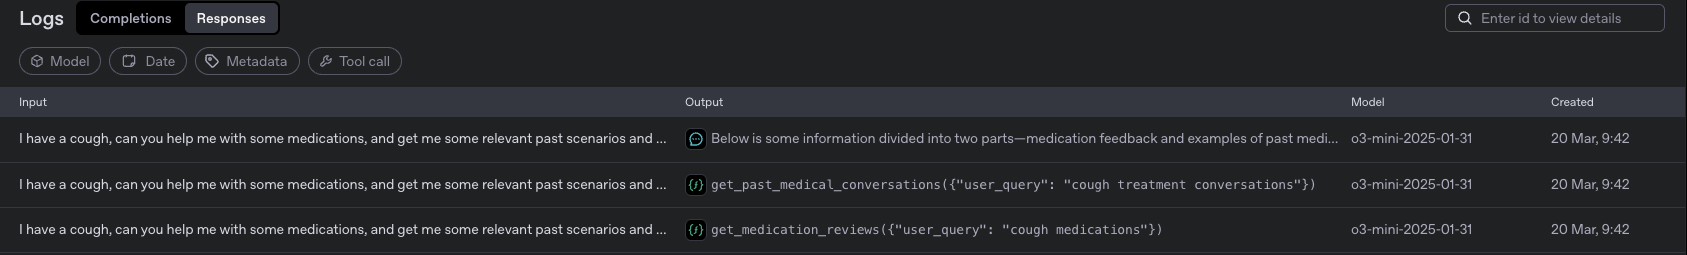

### Step 5: Agent as Tools (Ochestration)

In [101]:
# Define specialized agents for different information retrieval tasks
medication_agent = Agent(
    name="medication_information_agent",
    instructions="You provide detailed information about medications, their effectiveness, and side effects based on patient reviews. Always cite your sources.",
    handoff_description="A medication information specialist with access to patient reviews",
    tools=[get_medication_reviews],
)

conversation_agent = Agent(
    name="medical_conversation_agent",
    instructions="You provide examples of doctor-patient conversations related to specific medical conditions or symptoms. Always present this as educational content, not medical advice.",
    handoff_description="A specialist with access to past doctor-patient conversations",
    tools=[get_past_medical_conversations],
)

In [102]:
# Create an orchestrator agent that can use both specialized agents as tools
orchestrator_agent = Agent(
    name="medical_assistant_orchestrator",
    instructions=(
        "You are a virtual primary care assistant. Your job is to help patients by retrieving relevant information using your tools.\n\n"
        "IMPORTANT RULES:\n"
        "1. ALWAYS use translate_to_medication_information when a query mentions medications, treatments, or remedies\n"
        "2. ALWAYS use translate_to_medical_conversations when a query mentions medical conditions or asks for conversation examples\n"
        "3. If a query requires BOTH medication information AND medical conversations, use BOTH tools in sequence\n"
        "4. NEVER attempt to provide medical information without using your tools\n"
        "5. Each tool provides different types of information - use all appropriate tools for complete assistance"
    ),
    tools=[
        medication_agent.as_tool(
            tool_name="translate_to_medication_information",
            tool_description="Get information about medications, treatments, and patient reviews",
        ),
        conversation_agent.as_tool(
            tool_name="translate_to_medical_conversations",
            tool_description="Get examples of doctor-patient conversations about medical conditions",
        ),
    ],
)

In [103]:
# Final agent to synthesize information from all sources
synthesizer_agent = Agent(
    name="medical_response_synthesizer",
    instructions=(
        "You create comprehensive, well-organized responses for patients by combining information from multiple sources.\n\n"
        "When organizing your response:\n"
        "1. Clearly separate medication information from doctor-patient conversation examples\n"
        "2. Provide a concise summary at the beginning highlighting key points\n"
        "3. Include appropriate disclaimers about medical advice\n"
        "4. Format the information for easy reading, using bullet points where appropriate\n"
        "5. Ensure your tone is empathetic, clear, and professional"
    ),
)

In [129]:
from agents import ItemHelpers, MessageOutputItem, trace


async def virtual_primary_care_assistant(user_query):
    """Run the complete virtual primary care assistant workflow"""
    # First, have the orchestrator determine which tools to use
    with trace("Orchestrator evaluator"):
        orchestrator_result = await Runner.run(orchestrator_agent, user_query)

        # Print intermediate steps for debugging/transparency
        print("\n--- Orchestrator Processing Steps ---")
        for item in orchestrator_result.new_items:
            if isinstance(item, MessageOutputItem):
                text = ItemHelpers.text_message_output(item)
                if text:
                    print(f"  - Information gathering step: {text}")

        # Then synthesize all the gathered information into a cohesive response
        synthesizer_result = await Runner.run(
            synthesizer_agent, orchestrator_result.to_input_list()
        )

        print(f"\n\n--- Final Medical Response ---\n{synthesizer_result.final_output}")
        print()

    return synthesizer_result.final_output

In [130]:
import asyncio

import nest_asyncio

# Apply nest_asyncio to patch the event loop
nest_asyncio.apply()

In [132]:
def run_virtual_primary_care_assistant(query):
    # Create a new event loop
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)

    # Run the async function and get the result
    result = loop.run_until_complete(virtual_primary_care_assistant(query))

    # Clean up
    loop.close()

    return result

In [ ]:
# Now call the function this way
query = input("What health concern can I help you with today? ")
run_virtual_primary_care_assistant(query)

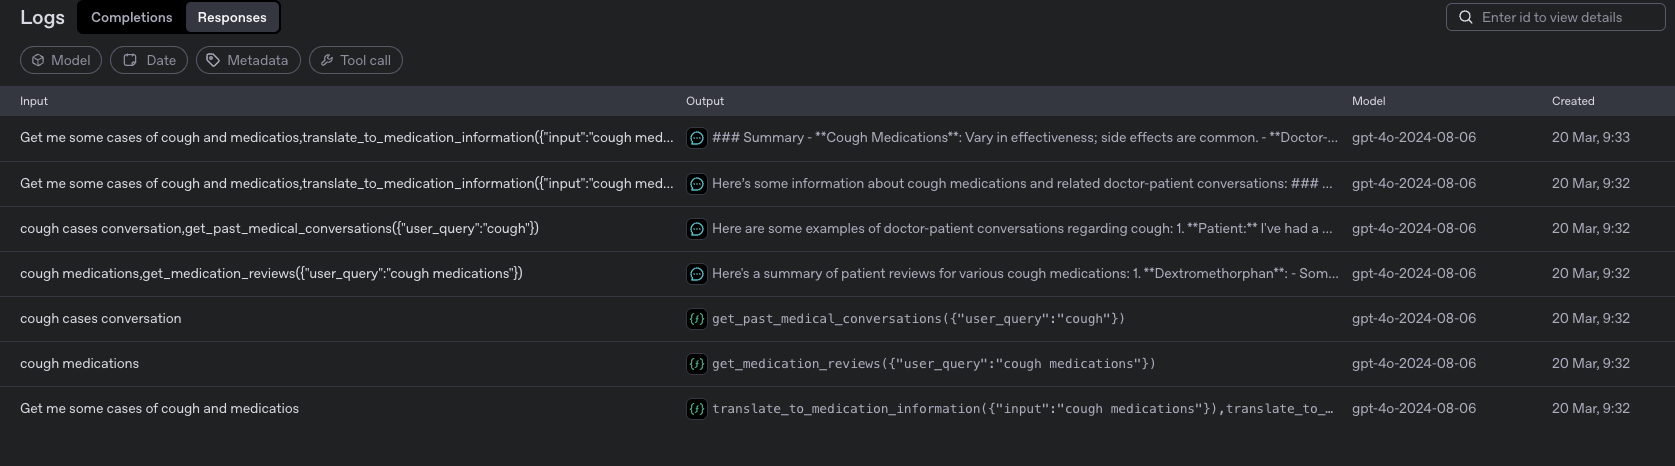

## Part 4: Agentic Chat System

---



<a name="part4"></a>


This section demonstrates an Agentic Chat System that enhances the virtual primary care assistant by maintaining a complete conversation history. The system features:

- **Persistent Chat History:** Every interaction, including the user’s input and the agent’s response, is stored along with a timestamp.
- **Contextual Input:** On each turn, the complete conversation history is appended to the agent's input, ensuring that the context is preserved throughout the conversation.
- **Session Management with Thread IDs:** Each message is tagged with a thread ID to uniquely identify the session, making it easy to track and retrieve conversation history.
- **Ordered Retrieval:** The chat history can be retrieved by providing a thread ID, with all records ordered by their timestamps.

Below is the complete code implementation for the Agentic Chat System.


In [ ]:
# Get a reference to the database (creates it if it doesn't exist)
db = mongo_client[DB_NAME]

# Create a chat_history collection in the MongoDB Database
chat_history_collection_name = "chat_history"

if chat_history_collection_name not in db.list_collection_names():
    db.create_collection(chat_history_collection_name)
    print(f"Collection '{chat_history_collection_name}' created successfully.")
else:
    # Collection already exists, no need to create it
    print(f"Collection '{chat_history_collection_name}' already exists.")

# Get a reference to collections for later use
chat_history_collection = db[chat_history_collection_name]

In [153]:
import datetime
import uuid


async def virtual_primary_care_assistant(user_query, thread_id=None):
    """
    Run the complete virtual primary care assistant workflow.

    For each conversation turn:
      - Stores the user's input and the assistant's output in the MongoDB collection along with a timestamp and thread_id.
      - Retrieves and appends previous conversation history (ordered by timestamp) to the agent's input.

    If no thread_id is provided, a new conversation session is started.

    Returns:
      tuple: (final_output, thread_id) where thread_id is the session identifier.
    """
    # Generate a new thread id if not provided.
    if thread_id is None:
        thread_id = str(uuid.uuid4())
        print(f"New conversation started with thread id: {thread_id}")
    else:
        print(f"Continuing conversation with thread id: {thread_id}")

    # --- Step 1: Store the new user query ---
    now = datetime.datetime.utcnow()
    chat_history_collection.insert_one(
        {
            "thread_id": thread_id,
            "role": "user",
            "message": user_query,
            "timestamp": now,
        }
    )

    # --- Step 2: Retrieve full conversation history for context ---
    chat_history = list(
        chat_history_collection.find({"thread_id": thread_id}).sort("timestamp", 1)
    )
    conversation_context = ""
    for entry in chat_history:
        if entry["role"] == "user":
            conversation_context += f"User: {entry['message']}\n"
        else:
            conversation_context += f"Assistant: {entry['message']}\n"

    # --- Step 3: Run the orchestrator agent with the conversation context ---
    with trace("Orchestrator evaluator"):
        orchestrator_result = await Runner.run(orchestrator_agent, conversation_context)

    # Print intermediate processing steps for debugging/transparency.
    print("\n--- Orchestrator Processing Steps ---")
    for item in orchestrator_result.new_items:
        if isinstance(item, MessageOutputItem):
            text = ItemHelpers.text_message_output(item)
            if text:
                print(f"  - Information gathering step: {text}")

    # --- Step 4: Run the synthesizer agent to produce a cohesive response ---
    synthesizer_result = await Runner.run(
        synthesizer_agent, orchestrator_result.to_input_list()
    )

    # --- Step 5: Store the assistant's final output in the chat history ---
    now = datetime.datetime.utcnow()
    chat_history_collection.insert_one(
        {
            "thread_id": thread_id,
            "role": "assistant",
            "message": synthesizer_result.final_output,
            "timestamp": now,
        }
    )

    print(f"\n\n--- Final Medical Response ---\n{synthesizer_result.final_output}\n")
    return synthesizer_result.final_output, thread_id

In [154]:
def run_virtual_primary_care_assistant(query, thread_id=None):
    """
    Run the virtual primary care assistant synchronously.

    Optionally, a thread_id can be provided to continue an existing conversation.
    Returns a tuple (final_output, thread_id).
    """
    # Create a new event loop
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)

    # Run the async function and get the result
    result, thread_id = loop.run_until_complete(
        virtual_primary_care_assistant(query, thread_id=thread_id)
    )

    # Clean up the loop
    loop.close()

    return result, thread_id

In [155]:
def chat_session():
    """
    Launches a chat session that continues until the user enters 'q', 'exit', or 'quit'.
    The session uses a persistent thread_id to preserve conversation history.
    """
    print(
        "Starting Virtual Primary Care Assistant Chat. Type 'q', 'exit' or 'quit' to exit."
    )
    session_thread_id = None
    while True:
        query = input("What health concern can I help you with today? ")
        if query.lower() in ["q", "exit", "quit"]:
            print("Exiting chat session.")
            break
        response, session_thread_id = run_virtual_primary_care_assistant(
            query, thread_id=session_thread_id
        )
        print("Assistant:", response)

In [ ]:
# Start the chat session
chat_session()